### Goal: the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [139]:
loan_df = pd.read_csv("loan.csv")

/var/folders/5z/bffwp3vj43vd66xms_0hx1s40000gp/T/ipykernel_38548/1429014459.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv("loan.csv")


#### Lets take a look at the data

In [140]:
loan_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [141]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [142]:
loan_df.shape

(39717, 111)

#### Look like we have 40,000 rows and 111 columns with different datatypes, lets take look at null values

#### lets take a look at null values

In [143]:
loan_df.isnull().sum()[loan_df.isnull().sum() > 0] 

emp_title                      2459
emp_length                     1075
desc                          12942
title                            11
mths_since_last_delinq        25682
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 68, dtype: int64

Data cleaning checklist
1. Fix rows and columns  $\checkmark$
2. Fix missing values
3. Standardise values
4. Fix invalid values
5. Filter data

#### looks like 68 out of 111 columns have null values, we should remove the null values but it doesn't make sense to remove the entire column just because it has a few null values so we will first remove the columns which are entirely null of 0
#### also for object data types

In [144]:
loan_df.isnull().sum()[loan_df.isnull().sum() == len(loan_df)]

mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717
acc_open_past_24mths              39717
avg_cur_bal                       39717
bc_open_to_buy                    39717
bc_util                           39717


In [145]:
loan_df = loan_df.dropna(how='all', axis= 1)

In [146]:
loan_df.shape

(39717, 57)

In [147]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### Alot of these columns have zero or NA values throughout, it doesn't look like they will be much useful, lets get rid of them aswell

In [148]:
print(loan_df["collections_12_mths_ex_med"].value_counts())
print(loan_df["acc_now_delinq"].value_counts())

collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64
acc_now_delinq
0    39717
Name: count, dtype: int64


In [149]:
for col in loan_df.columns:
    if loan_df[col].replace(0, np.nan).isna().all():
        print(col)
        loan_df = loan_df.drop(columns=[col], axis=1)

collections_12_mths_ex_med
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


In [150]:
loan_df.shape

(39717, 52)

In [151]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

Columns like id, member_id, url are from transactional database and does not add any doesn't any value or contribute to risk assessment
Columns emp_title, issue_d

There seems to be a redundancy between, funded_amnt and funded_amnt_inv. Since we are only interested in the funds the were provided by us, we can drop the former.

Columns like initial_list_status, collection_recovery_fee, next_pymnt_d carry less significance

#### Important for risk analysis:

loan_amnt, int_rate, installment, grade, sub_grade: These are directly tied to the loan and risk assessment.

emp_title, emp_length, annual_inc: Important for evaluating the borrower's financial stability.

home_ownership, verification_status: Useful for understanding the borrower’s financial background.


dti (Debt-to-Income Ratio), delinq_2yrs, inq_last_6mths, mths_since_last_delinq, mths_since_last_record: Important metrics for understanding the borrower's creditworthiness and history of delinquencies.

open_acc, total_acc, pub_rec, pub_rec_bankruptcies, revol_bal, revol_util: All relate to credit history and available credit, crucial for risk.

recoveries, total_pymnt, out_prncp: Payment-related columns that reflect on the borrower’s payment behavior.

earliest_cr_line, last_credit_pull_d: Useful for assessing the length of credit history.


In [152]:
loan_df = loan_df.drop([   'id', 
    'member_id', 
    'url', 
    'desc', 
    'title', 
    'zip_code', 
    'policy_code','funded_amnt', 'initial_list_status', 'collection_recovery_fee', 'next_pymnt_d','emp_title',], axis = 1)

In [153]:
loan_df = loan_df.dropna(subset=['emp_length', 'revol_util'])
loan_df.shape
loan_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 38595 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38595 non-null  int64  
 1   funded_amnt_inv         38595 non-null  float64
 2   term                    38595 non-null  object 
 3   int_rate                38595 non-null  object 
 4   installment             38595 non-null  float64
 5   grade                   38595 non-null  object 
 6   sub_grade               38595 non-null  object 
 7   emp_length              38595 non-null  object 
 8   home_ownership          38595 non-null  object 
 9   annual_inc              38595 non-null  float64
 10  verification_status     38595 non-null  object 
 11  issue_d                 38595 non-null  object 
 12  loan_status             38595 non-null  object 
 13  pymnt_plan              38595 non-null  object 
 14  purpose                 38595 non-null  obj

In [154]:
loan_df.shape

(38595, 40)

#### now that we have finalized the columns, lets take look for missing values and standardize the data
##### term and interest should  be integer and float

In [155]:
loan_df.term = loan_df.term.apply(lambda x : int(x.replace("months", "")))

In [156]:
loan_df.int_rate = loan_df.int_rate.apply(lambda x : float(x.replace("%", "")))


In [157]:
# There's over a 1000 columns with unknown employment length, it is better to drop them instead of predicting them
loan_df.emp_length = loan_df["emp_length"].dropna()
# employment length seems to have symbols like + and >
# "10+ years": Convert to 10 
# "< 1 year": Convert to 0.5 
# "X years": Convert to X n



def clean_emp_length(emp_len):
    if emp_len == "10+ years":
        return 10
    if emp_len == "< 1 year":
        return 0.5
    return int(emp_len.split()[0])

loan_df.emp_length = loan_df.emp_length.apply(clean_emp_length)

In [158]:
loan_df.sub_grade =  loan_df.sub_grade.apply(lambda x : int(x[-1]))
loan_df.earliest_cr_line = loan_df.earliest_cr_line.apply(lambda x : datetime.strptime(x, "%b-%y"))
loan_df.issue_d = loan_df.issue_d.apply(lambda x : datetime.strptime(x, "%b-%y"))
loan_df["credit_history"] = loan_df.issue_d - loan_df.earliest_cr_line


In [159]:
# Checking for duplicates
loan_df.duplicated().sum()



0

Now that data is clean enough, lets take figure out the variables that can help us in figuring out if the loan is going to be defaulted

In [160]:

loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,pub_rec_bankruptcies,credit_history
0,5000,4975.0,36,10.65,162.87,B,2,10.0,RENT,24000.0,...,5000.00,863.16,0.00,0.00,Jan-15,171.62,May-16,INDIVIDUAL,0.0,9830 days
1,2500,2500.0,60,15.27,59.83,C,4,0.5,RENT,30000.0,...,456.46,435.17,0.00,117.08,Apr-13,119.66,Sep-13,INDIVIDUAL,0.0,4627 days
2,2400,2400.0,36,15.96,84.33,C,5,10.0,RENT,12252.0,...,2400.00,605.67,0.00,0.00,Jun-14,649.91,May-16,INDIVIDUAL,0.0,3682 days
3,10000,10000.0,36,13.49,339.31,C,1,10.0,RENT,49200.0,...,10000.00,2214.92,16.97,0.00,Jan-15,357.48,Apr-16,INDIVIDUAL,0.0,5782 days
4,3000,3000.0,60,12.69,67.79,B,5,1.0,RENT,80000.0,...,2475.94,1037.39,0.00,0.00,May-16,67.79,May-16,INDIVIDUAL,0.0,5813 days


In [161]:
loan_df.home_ownership.value_counts()
# There are only 4 records with "None" as home ownership, it is better to merge them with "OTHER"
loan_df.home_ownership = loan_df.home_ownership.replace("NONE", "OTHER")

#### Since we are interested in Defaulters and Fully Paid loans, we can ignore Currently paying loaners

In [162]:
loan_df = loan_df[loan_df['loan_status'] != 'Current']

#### Lets handle outliers



In [163]:
loan_df.shape

(37497, 41)

In [164]:
loan_df.isna().sum()

loan_amnt                     0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    24172
mths_since_last_record    34878
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_re

In [165]:
loan_df.mths_since_last_delinq.isna().sum()

24172

#### lets take a look at various columns and how are they related to defaulting

### 1. Interest Rate: Interest Rate on the loan, (Ordered Category)


count    37497.000000
mean        11.958772
std          3.682062
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64


<Axes: ylabel='int_rate'>

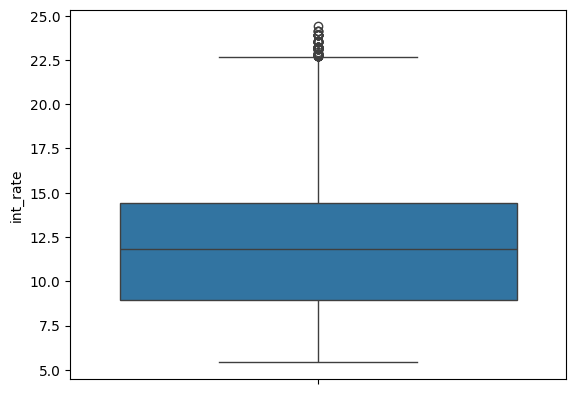

In [166]:
print(loan_df["int_rate"].describe())
sns.boxplot(y='int_rate', data=loan_df)

<Axes: xlabel='loan_status', ylabel='int_rate'>

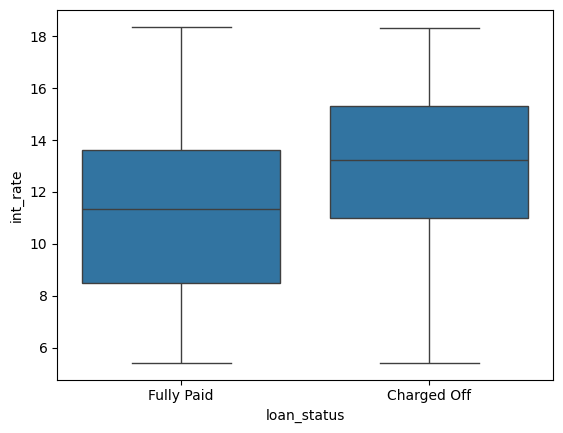

In [167]:
# removing outliers from int_rate
sns.boxplot(x='loan_status', y='int_rate', data=loan_df[loan_df.int_rate < loan_df["int_rate"].quantile(0.95)])

#### Looks like interests rate have a median value of 11.86 with max going up to 24. When grouped by the loan status, it appears the people who defaulted on their loans had median of 13.610000 while who were to able to pay it off had an interest rate of 11.4.


### 2. Home Ownership: The home ownership status provided by the borrower during registration

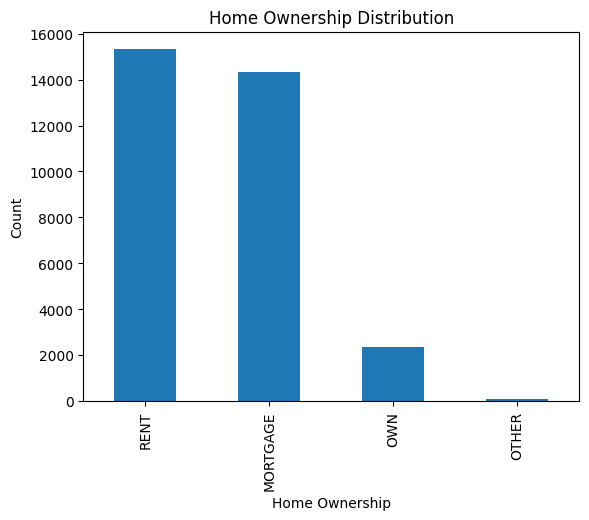

In [168]:

# ["home_ownership"]
defaulters = loan_df[loan_df["loan_status"] == "Charged Off"]
paid_off = loan_df[loan_df["loan_status"] == "Fully Paid"]
paid_off['home_ownership'].value_counts().plot(kind='bar')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Home Ownership Distribution')
plt.show()


<Axes: xlabel='home_ownership'>

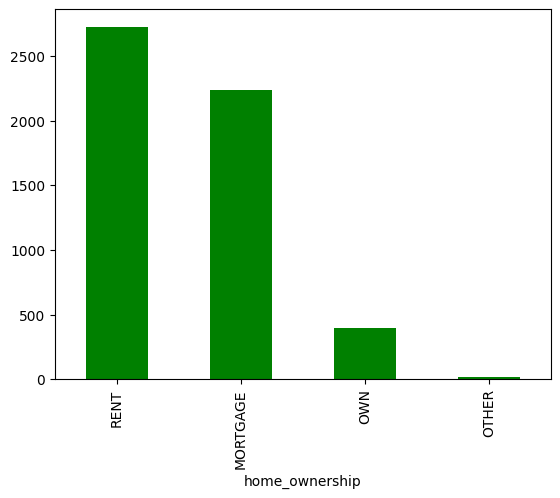

In [169]:
defaulters['home_ownership'].value_counts().plot(kind='bar')
defaulters['home_ownership'].value_counts().plot(kind='bar', color='green')

#### Home ownership does not tell us much about the defaulters. Lets take a look at other variables


### 4. Grade and Subgrade: LC assigned loan grade and sub grade

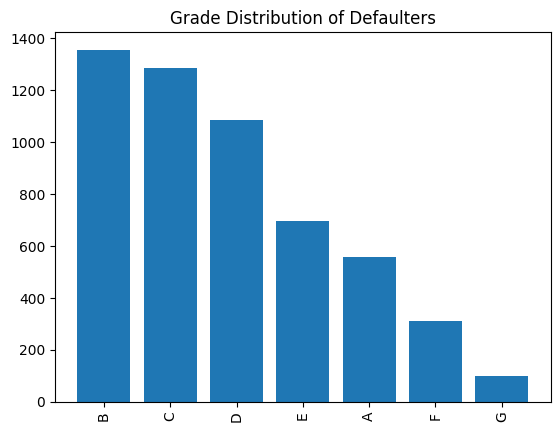

In [170]:
# Grade and sub gradfe

plt.xticks(rotation=90)
plt.bar(defaulters['grade'].value_counts().index, defaulters['grade'].value_counts().values)
plt.title('Grade Distribution of Defaulters')
plt.show()

Text(0.5, 1.0, 'Grade Distribution of Fully Paid')

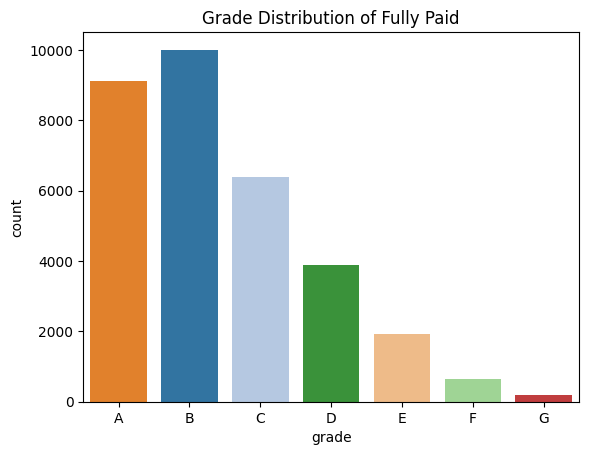

In [171]:
# loan_df['grade'].value_counts()
sns.countplot(x='grade', data=paid_off, order=sorted(paid_off['grade'].unique()), palette='tab20', hue='grade')
plt.title('Grade Distribution of Fully Paid')

Text(0.5, 1.0, 'Grade Distribution of Defaulters')

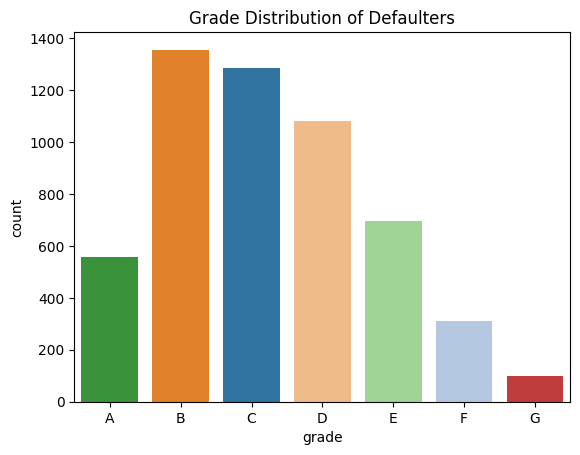

In [172]:
# loan_df['grade'].value_counts()
sns.countplot(x='grade', data=defaulters, order=sorted(loan_df['grade'].unique()), palette='tab20', hue='grade')
plt.title('Grade Distribution of Defaulters')


Text(0.5, 1.0, 'Sub Grade Distribution of Defaulters')

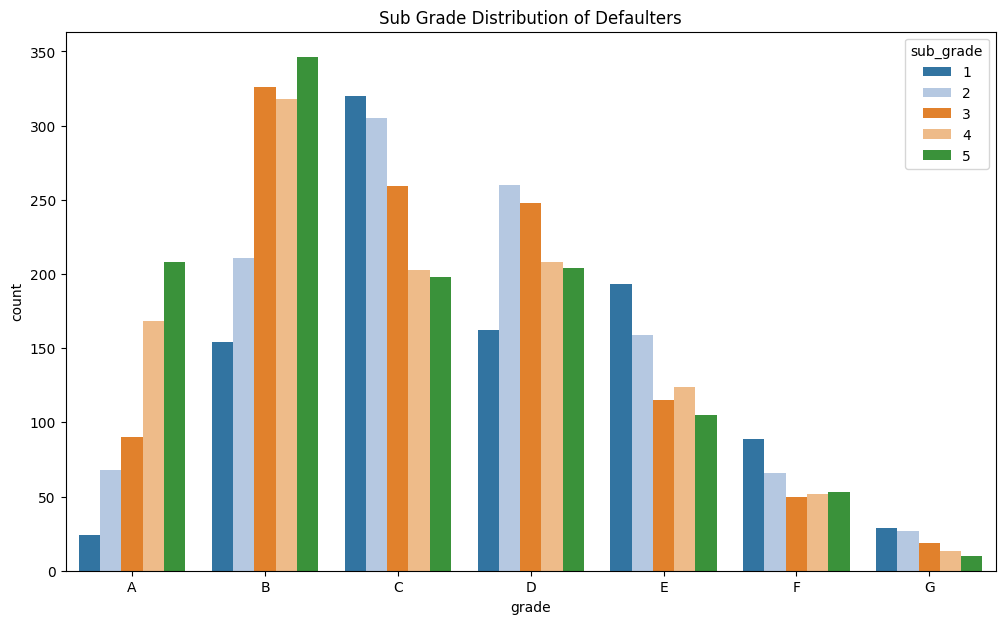

In [173]:

fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='grade', data=defaulters  , hue = "sub_grade", order=sorted(loan_df['grade'].unique()), palette="tab20")
plt.title('Sub Grade Distribution of Defaulters')

#### Insight: Borrowers in grades B, C, and D, particularly in sub-grades 4 and 5, appear to be at higher risk of defaulting.


#### 5. Verification Status: Indicates if income was verified by LC, not verified, or if the income source was verified

Text(0.5, 1.0, 'Verification Status Distribution of Defaulters')

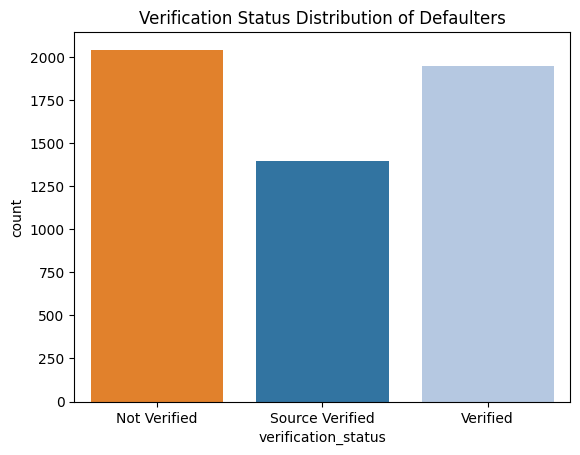

In [174]:
sns.countplot(x='verification_status', data=defaulters  , order=sorted(loan_df['verification_status'].unique()), palette="tab20", hue='verification_status')
plt.title('Verification Status Distribution of Defaulters')

In [175]:

print(loan_df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
Index: 37497 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   loan_amnt               37497 non-null  int64          
 1   funded_amnt_inv         37497 non-null  float64        
 2   term                    37497 non-null  int64          
 3   int_rate                37497 non-null  float64        
 4   installment             37497 non-null  float64        
 5   grade                   37497 non-null  object         
 6   sub_grade               37497 non-null  int64          
 7   emp_length              37497 non-null  float64        
 8   home_ownership          37497 non-null  object         
 9   annual_inc              37497 non-null  float64        
 10  verification_status     37497 non-null  object         
 11  issue_d                 37497 non-null  datetime64[ns] 
 12  loan_status             37497 non-nul

#### 6. purpose: REquirement  provided by the borrower for the loan request. 

/var/folders/5z/bffwp3vj43vd66xms_0hx1s40000gp/T/ipykernel_38548/3369004370.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(defaulters['purpose'], palette='tab20')


<Axes: xlabel='count', ylabel='purpose'>

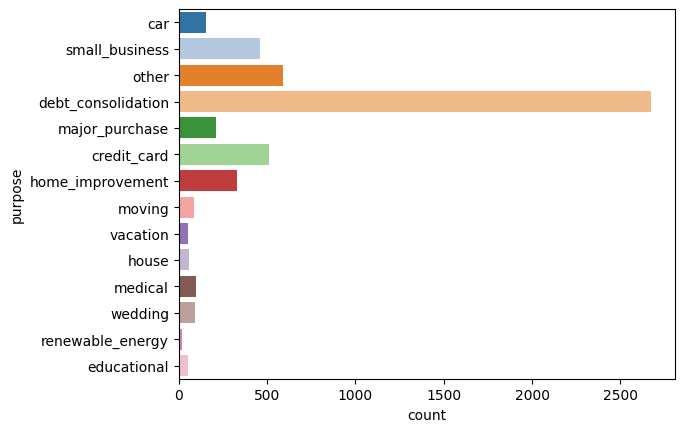

In [176]:
sns.countplot(defaulters['purpose'], palette='tab20')

The most common loan that defaults is taken for debt consolidation, with significantly more defaulters compared to any other loan purpose. 
This suggests that borrowers consolidating debt may already be financially stressed

#### 6. Credit History: The longer the credit history, the more experience the borrower likely has managing debt. This is a  Derived  Metric and can be calculated by subtracting earliest_cr_line from loan issue date

<Axes: xlabel='credit_history_bin', ylabel='count'>

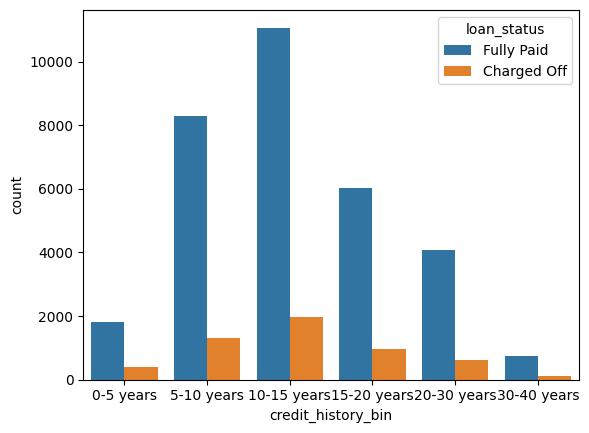

In [237]:

loan_df['credit_history_bin'] = pd.cut(loan_df.credit_history.apply(lambda x : round(x.total_seconds() / (60*60*24*365),1)), labels=labels, bins=bins)
# defaulters['credit_history_bin'] = pd.cut(defaulters.credit_history.apply(lambda x : round(x.total_seconds() / (60*60*24*365),1)), labels=labels, bins=bins)
sns.countplot(data=loan_df, x='credit_history_bin', hue='loan_status')

#### Insights: Most borrowers fall into the 10-15 and 5-10 years of credit history range. Borrowers with less experience handling credit i.e 0-15 years are more likely to default than seasoned borrowoeres i.e 30-40 years of experience.
